In [1]:
import utils.mnist_reader as mnist_reader
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)


Training data shape: (60000, 784)
Training labels shape: (60000,)
Test data shape: (10000, 784)
Test labels shape: (10000,)


In [ ]:
X_train_normalized = X_train.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


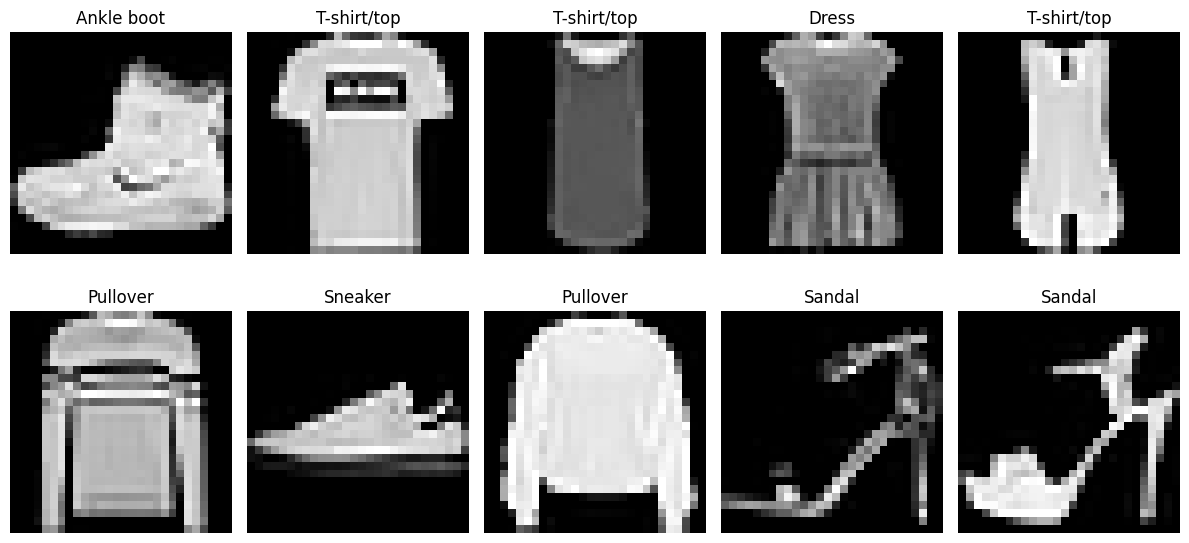

In [4]:
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i in range(10):
    row = i // 5
    col = i % 5
    axes[row, col].imshow(X_train[i].reshape(28, 28), cmap='gray')
    axes[row, col].set_title(f'{class_names[y_train[i]]}')
    axes[row, col].axis('off')
plt.tight_layout()
plt.show()


In [5]:
from sklearn.neighbors import KNeighborsClassifier

k = 3
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

print(f"Training KNN with k={k}...")
knn.fit(X_train_normalized, y_train)
print("Training completed!")


Training KNN with k=3...
Training completed!


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test_normalized)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with k={k}: {accuracy:.4f} ({accuracy*100:.2f}%)")


Making predictions...
\nAccuracy with k=3: 0.8541 (85.41%)


In [7]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=class_names))


Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.76      0.85      0.80      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.72      0.81      0.76      1000
       Dress       0.91      0.85      0.88      1000
        Coat       0.80      0.74      0.77      1000
      Sandal       0.99      0.83      0.91      1000
       Shirt       0.65      0.59      0.62      1000
     Sneaker       0.89      0.95      0.92      1000
         Bag       0.98      0.95      0.97      1000
  Ankle boot       0.89      0.97      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



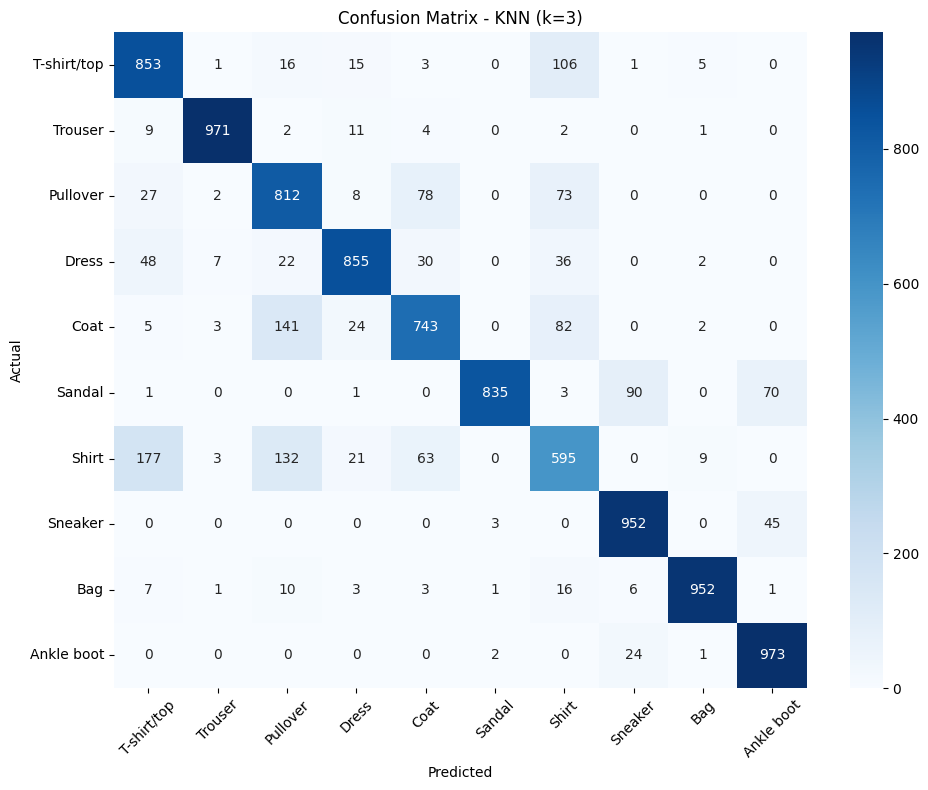

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title(f'Confusion Matrix - KNN (k={k})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Testing different k values...
k=1: Accuracy = 0.8497
k=3: Accuracy = 0.8541
k=5: Accuracy = 0.8554
k=7: Accuracy = 0.8540
k=9: Accuracy = 0.8519
k=11: Accuracy = 0.8495
k=13: Accuracy = 0.8468
k=15: Accuracy = 0.8462
k=17: Accuracy = 0.8441
k=19: Accuracy = 0.8427
k=21: Accuracy = 0.8407


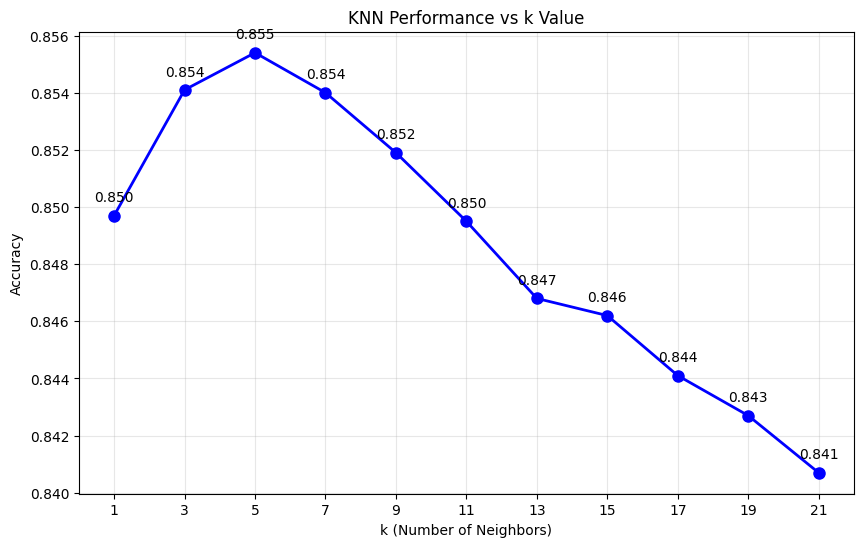

Best k: 5 with accuracy: 0.8554


In [10]:
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
accuracies = []

print("Testing different k values...")
for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_temp.fit(X_train_normalized, y_train)
    y_pred_temp = knn_temp.predict(X_test_normalized)
    acc = accuracy_score(y_test, y_pred_temp)
    accuracies.append(acc)
    print(f"k={k}: Accuracy = {acc:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, 'bo-', linewidth=2, markersize=8)
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('KNN Performance vs k Value')
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
for i, (k, acc) in enumerate(zip(k_values, accuracies)):
    plt.annotate(f'{acc:.3f}', (k, acc), textcoords="offset points", xytext=(0,10), ha='center')
plt.show()

best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)
print(f"Best k: {best_k} with accuracy: {best_accuracy:.4f}")
